In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Data prep

print(len(train))
print(len(test))

test.columns

282451
139119


Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [4]:
df = pd.concat([train,test], axis = 0)

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type,Unemployment,Weekly_Sales
0,136.213613,2011-08-26,92,3.796,False,NaN,NaN,NaN,NaN,NaN,152513,26,61.10,A,7.767,87235.57
1,128.616064,2011-03-25,22,3.480,False,NaN,NaN,NaN,NaN,NaN,158114,34,53.11,A,10.398,5945.97
2,211.265543,2010-12-03,28,2.708,False,NaN,NaN,NaN,NaN,NaN,140167,21,50.43,B,8.163,1219.89
3,214.878556,2010-09-17,9,2.582,False,NaN,NaN,NaN,NaN,NaN,155078,8,75.32,A,6.315,11972.71
4,138.106581,2012-05-18,55,4.029,False,12613.98,NaN,11.5,1705.28,3600.79,203819,19,58.81,A,8.150,8271.82


In [6]:
df.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,282451.000000
mean,171.201947,44.260317,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739,22.200546,60.090059,7.960289,15983.429692
std,39.159276,30.492054,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328,12.785297,18.447931,1.863296,22661.092494
min,126.064000,1.000000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000,1.000000,-2.060000,3.879000,-4988.940000
25%,132.022667,18.000000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000,11.000000,46.680000,6.891000,2079.330000
50%,182.318780,37.000000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000,22.000000,62.090000,7.866000,7616.550000
75%,212.416993,74.000000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000,33.000000,74.280000,8.572000,20245.745000
max,227.232807,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,45.000000,100.140000,14.313000,693099.360000


In [7]:
#check for missing data

df.isnull().sum()

CPI                  0
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Store                0
Temperature          0
Type                 0
Unemployment         0
Weekly_Sales    139119
dtype: int64

In [8]:
# basic feature engineering to indicate whether a markdown was active

df = df.assign(md1_present = df.MarkDown1.notnull())
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())

In [9]:
# fill in missing values with zero

df.fillna(0, inplace=True)

In [10]:
#normalize 
df['Unemployment'] = (df['Unemployment'] - df['Unemployment'].mean())/(df['Unemployment'].std())

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


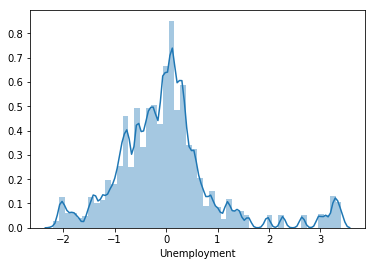

In [11]:
sns.distplot(df['Unemployment'])

In [12]:
df.dtypes

CPI             float64
Date             object
Dept              int64
Fuel_Price      float64
IsHoliday          bool
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
Size              int64
Store             int64
Temperature     float64
Type             object
Unemployment    float64
Weekly_Sales    float64
md1_present        bool
md2_present        bool
md3_present        bool
md4_present        bool
md5_present        bool
dtype: object

In [13]:
# Dummy variables for categorical data

# Update values in the columns so we can later recognize what a dummy once belonged to
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)

# Create dummies
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])

In [14]:
# Add dummies to df
df = pd.concat([df,type_dummies,store_dummies,dept_dummies],axis=1)

In [15]:
# Remove originals
del df['Type']
del df['Store']
del df['Dept']

In [16]:
df.dtypes

CPI             float64
Date             object
Fuel_Price      float64
IsHoliday          bool
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
Size              int64
Temperature     float64
Unemployment    float64
Weekly_Sales    float64
md1_present        bool
md2_present        bool
md3_present        bool
md4_present        bool
md5_present        bool
Type_A            uint8
Type_B            uint8
Type_C            uint8
Store_1           uint8
Store_10          uint8
Store_11          uint8
Store_12          uint8
Store_13          uint8
Store_14          uint8
Store_15          uint8
Store_16          uint8
Store_17          uint8
                 ...   
Dept_59           uint8
Dept_6            uint8
Dept_60           uint8
Dept_65           uint8
Dept_67           uint8
Dept_7            uint8
Dept_71           uint8
Dept_72           uint8
Dept_74           uint8
Dept_77           uint8
Dept_78         

In [17]:
# because this is a very simple linear regression, we will ignore the date

del df['Date']

In [18]:
# now we can split the train and test data again

train = df.iloc[:282451]
test = df.iloc[282451:]


In [19]:
z = test['Weekly_Sales'].values
test = test.drop('Weekly_Sales',axis=1) # We should remove the nonsense values from test

In [20]:
# To get numpy arrays out of the pandas dataframe, we can ask for a columns, or dataframes values
y = train['Weekly_Sales'].values
y.shape

(282451,)

In [21]:
X = train.drop('Weekly_Sales',axis=1).values

In [22]:
X.shape

(282451, 145)

In [23]:
# Now we create the baseline model

from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(Dense(1, input_dim = 145))
model.compile(optimizer = 'adam', loss = 'mae')

In [25]:
model.fit(X, y, batch_size = 2048, epochs= 5)

# An epoch is a measure of the number of times all of the training vectors are used once to update the weights.

Epoch 1/5
282451/282451 [==============================] - 8s 28us/step - loss: 28326.8243
Epoch 2/5
282451/282451 [==============================] - 8s 28us/step - loss: 14142.1083
Epoch 3/5
282451/282451 [==============================] - 8s 27us/step - loss: 13032.7828
Epoch 4/5
282451/282451 [==============================] - 8s 27us/step - loss: 13001.5184
Epoch 5/5
282451/282451 [==============================] - 8s 27us/step - loss: 12989.0092


In [26]:
# Predict on the test set with newly created model

X_test = test.values

In [27]:
y_pred = model.predict(X_test, batch_size = 2048)
print(y_pred)

[[14193.163 ]
 [ 7153.9   ]
 [ 2269.2402]
 ...
 [ 2473.7056]
 [12400.032 ]
 [12527.026 ]]


In [28]:
# To create the ids required for the submission we need the original test file one more time

testfile = pd.read_csv('test.csv')

In [29]:
# Create the submission

submission = pd.DataFrame({'id':testfile['Store'].map(str) + '_' + testfile['Dept'].map(str) + '_' + testfile['Date'].map(str),
                          'Weekly_Sales':y_pred.flatten()})

In [30]:
submission.to_csv('linreg.csv',index=False)

In [31]:
from sklearn import metrics

In [32]:
print(metrics.mean_absolute_error(z, y_pred))


8072.817709369605


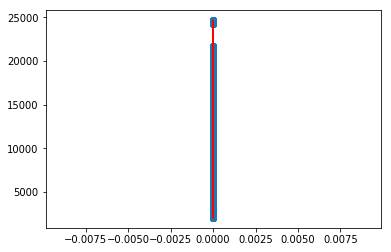

In [33]:
plt.scatter(z, y_pred)
plt.plot(z, y_pred, color='red')
plt.show()